# Summer Analytics 2022
# WEEK-2 Graded Assignment: Linear Regression

## Introduction

In this exercise, you will implement linear regression and get to see it work on data. Before starting on this programming exercise, we strongly recommend watching the video lectures and work out ungraded assisgnment ,completing the review questions for the associated topics.

All the information you need for solving this assignment is in this notebook, and all the code you will be implementing will take place within this notebook.

Before we begin with the exercises, we need to import all libraries required for this programming exercise. Throughout the course, we will be using [`numpy`](http://www.numpy.org/) for all arrays and matrix operations, and [`matplotlib`](https://matplotlib.org/) for plotting.

In [88]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np

# Plotting library
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # needed to plot 3-D surfaces

# tells matplotlib to embed plots within the notebook
%matplotlib inline

Iris species of a flower is one of the most popular datasets for machine learning. This dataset is primarily for classification, but here we will use same dataset with some changes so that we can use it for Linear Regression. Let's load the dataset first.

In [89]:
import pandas as pd
from sklearn import datasets
iris = datasets.load_iris()

It includes three iris species named as 'setosa' , 'versicolor', 'virginica' with  some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

The columns in this dataset are:

Id, 
Sepal Length Cm, 
Sepal Width Cm,,
Petal Length Cm, 
Petal Width Cm, 
Species. Let's see some of the first rows of the datasets after loading it from sklearn.

In [90]:
iris_data =pd.DataFrame(iris.data, columns=iris.feature_names)
iris_data["target"]=iris.target
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


We can now rename column name to make it more standard for ease of coding and readability.

In [91]:
iris_data.rename(columns={'sepal length (cm)':'sepal_length',
                          'sepal width (cm)':'sepal_width',
                          'petal length (cm)':'petal_length',
                          'petal width (cm)':'petal_width'},inplace=True)
        
iris_data.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


Add a new column named "species" having value {if target == 0 : 'setosa' ,
if target ==1 : 'versicolor',
if target == 2 : 'virginica' }

In [116]:
#your code here
def species( target):

    if(target == 0):
        spec = 'setosa'
    elif(target == 1):
        spec = 'versicolor'
    elif(target == 2):
        spec = 'virginica'
    else:
        spec = ""
    return spec

iris_data["species"] = np.vectorize(species)(iris_data['target'])


we will now select "versicolor" to predict its "petal_width" using "petal_length " as one of the parameter.So your next task is to make a new DataFrame named "data" having only rows whose species values are 'versicolor'.


In [117]:
#your code here
data = iris_data[iris_data["species"] == 'versicolor']
data.head()

,sepal_length,sepal_width,petal_length,petal_width,target,species
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


Now we are droping  all the columns except petal_length and petal_width 

In [118]:
data.drop(columns=['target','species','sepal_length','sepal_width'],inplace=True)
data.head()

/tmp/ipykernel_32514/220937503.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['target','species','sepal_length','sepal_width'],inplace=True)


,petal_length,petal_width
50,4.7,1.4
51,4.5,1.5
52,4.9,1.5
53,4.0,1.3
54,4.6,1.5


Now write code to print the shape of DataFrame named as data.

In [119]:
#your code here
data.shape

(50, 2)

Now  plot the Dataframe named data having x axis as 'petal_length', y axis as 'petal_width' and kind='scatter' 

Text(0, 0.5, 'petal_width')

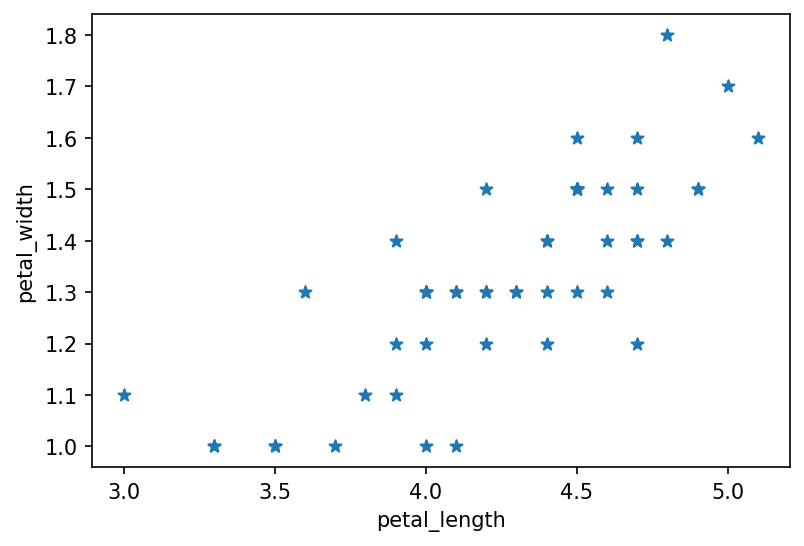

In [120]:
#your code here
pyplot.figure(figsize=(6,4),dpi=150)
pyplot.scatter(data['petal_length'],data['petal_width'],marker='*');
pyplot.xlabel('petal_length')
pyplot.ylabel('petal_width')

Now let's start with Linear Regression

We will now split the dataset into training and test datasets into (X_train,Y_train) and (X_test,Y_test)

In [121]:
from sklearn.model_selection import train_test_split
X=data['petal_length'].values.reshape(-1,1)
Y=data['petal_width'].values.reshape(-1,1)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.33,random_state=1)


Now let's plot the training  datasets of  kind scatter with x axis as X_train and y axis as Y_train.

Text(0.5, 1.0, 'Train_data')

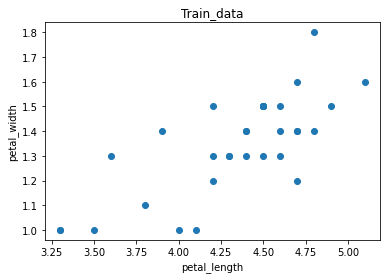

In [122]:
#your code here for plotting training dataset
pyplot.scatter(X_train,Y_train)
pyplot.xlabel("petal_length")
pyplot.ylabel("petal_width")
pyplot.title("Train_data")

Now let's plot the test datasets of kind scatter with x axis as X_test and y axis as Y_test

Text(0.5, 1.0, 'Test_data')

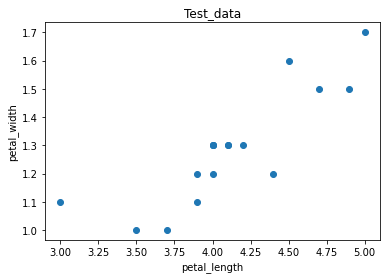

In [123]:
#your code here for plotting test dataset
pyplot.scatter(X_test,Y_test)
pyplot.xlabel("petal_length")
pyplot.ylabel("petal_width")
pyplot.title("Test_data")

Now write the code for LinearRegession using sklearn.

In [124]:
from sklearn.linear_model import LinearRegression
#your code here
linear_model = LinearRegression(fit_intercept=True)
linear_model.fit(X_train,Y_train)

LinearRegression()

Now print the Intercept and Coefficient.

In [125]:
#your code here
print("intercept",linear_model.intercept_)
print("coeff",linear_model.coef_)

intercept [-0.10228121]
coeff [[0.3338594]]


Now we can overlay the predicted line and test data points to see where the predicted point lies.

In [126]:
#your code here
prediction = linear_model.predict(X_test)

In [127]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
MAE = mean_absolute_error(Y_test,prediction) 
MSE = mean_squared_error(Y_test,prediction)

In [128]:
MAE

0.08041016119503752

In [129]:
MSE

0.01039538535660287

In [130]:
final_model = LinearRegression(fit_intercept=True)
final_model.fit(X,Y)

LinearRegression()

In [131]:
final_model.coef_

array([[0.3310536]])

In [132]:
from joblib import dump,load
dump(final_model,'linear_model.joblib')

['linear_model.joblib']

In [133]:
loaded_model = load('linear_model.joblib')

In [134]:
loaded_model.predict([[2]])

array([[0.57781885]])

This is end of assisgnment , but for futhur reading you can search articles on 
Lasso Regression, Multivariate Regression , ElasticNet regression, Ridge Regression, Stepwise Regression.